### Polynomial regression


In [51]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

In [121]:
x = np.arange(20, dtype=np.longdouble)
y = np.cos(x / 2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]


In [122]:
def normalize_z_score(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    return (X - mean) / std, mean, std


def calc_cost(x_train, y_train, w, b) -> float:
    m: int = len(x_train)
    f_wb = x_train @ w + b
    cost: float = (1 / (2 * m)) * np.sum((f_wb - y_train) ** 2)

    return cost


def find_gradient(x_train, y_train, w, b):
    m: int = len(x_train)
    pred = (x_train @ w) + b
    e = pred - y_train

    diff_w = (1 / m) * (x_train.T @ e)
    diff_b = (1 / m) * np.sum(e)

    return diff_w, diff_b


def gradient_descent(x_train, y_train, iterations: int, learning_rate: float):
    m: int = len(x_train)
    n: int = len(x_train[0])

    w = np.zeros(n, dtype=np.longdouble)
    b: float = 0

    for _ in range(iterations):
        diff_w, diff_b = find_gradient(x_train, y_train, w, b)
        w -= learning_rate * diff_w
        b -= learning_rate * diff_b

    return w, b


def predict(data, w, b):
    return (data @ w) + b


def get_data(x_train, y_train):
    iterations: int = 1000000
    learning_rate: float = 1e-1

    x_train, std, mean = normalize_z_score(x_train)
    w, b= gradient_descent(x_train, y_train, iterations, learning_rate)

    return w, b

w, b = get_data(X, y)

[ -1.34 -10.    24.78   5.96 -12.49 -16.26  -9.51   0.59   8.7   11.94
   9.27   0.79 -12.82] -0.007287194855839251


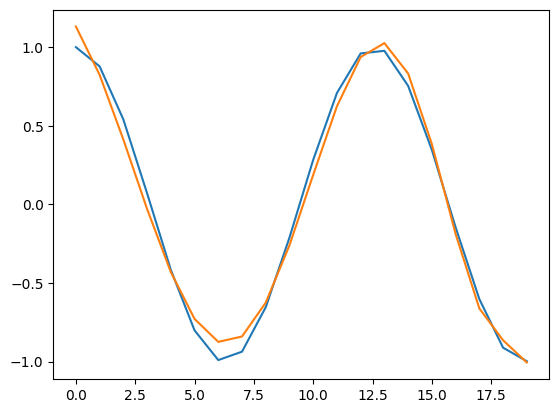

In [123]:
def test():
    size: int = 20
    x = np.arange(size, dtype=np.longdouble)
    y = np.cos(x / 2)
    X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
    X, _, _ = normalize_z_score(X)
    
    print(w, b)
    
    plt.plot(np.arange(size), y)
    plt.plot(np.arange(size), (X @ w) + b)

test()